In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS

In [2]:
train=pd.read_csv('labeledTrainData.tsv',delimiter="\t",quoting=3)
test=pd.read_csv('testData.tsv',delimiter="\t",quoting=3)
train.head()
train=train.drop('id',axis=1)
train.head()

,sentiment,review
0,1,"""With all this stuff going down at the moment ..."
1,1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,0,"""The film starts with a manager (Nicholas Bell..."
3,0,"""It must be assumed that those who praised thi..."
4,1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
df2=pd.read_csv('imdb_master.csv',encoding='latin-1')
df2.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [4]:
df2 = df2.drop(['Unnamed: 0','type','file'],axis=1)
df2.columns = ["review","sentiment"]


In [5]:
df2=df2[df2.sentiment!='unsup']
df2['sentiment']=df2['sentiment'].map({"pos":1,"neg":0})
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [6]:
training=pd.concat([train,df2]).reset_index(drop=True)
training.shape

(75000, 2)

In [7]:
stop=set(stopwords.words("english"))
def clean_text(review):
    text=BeautifulSoup(review).get_text()
    low_text=re.sub("[^A-Za-z]"," ",text)
    low_text=low_text.lower().split()
    new_words=[w for w in low_text if not w in stop]
    return (" ".join(new_words))

num_reviews=training['review'].size
clean_review=[]
for i in range(0,num_reviews):
    if( (i+1)%10000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ))
    clean_review.append(clean_text(training['review'][i]))
    

Review 10000 of 75000

Review 20000 of 75000

Review 30000 of 75000

Review 40000 of 75000

Review 50000 of 75000

Review 60000 of 75000

Review 70000 of 75000



In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(analyzer='word',max_features=6000,tokenizer=None,stop_words=None)
train_data_features=vector.fit_transform(clean_review)

In [10]:
clean_review[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [9]:
train_data_features[0]

<1x6000 sparse matrix of type '<class 'numpy.int64'>'
	with 147 stored elements in Compressed Sparse Row format>

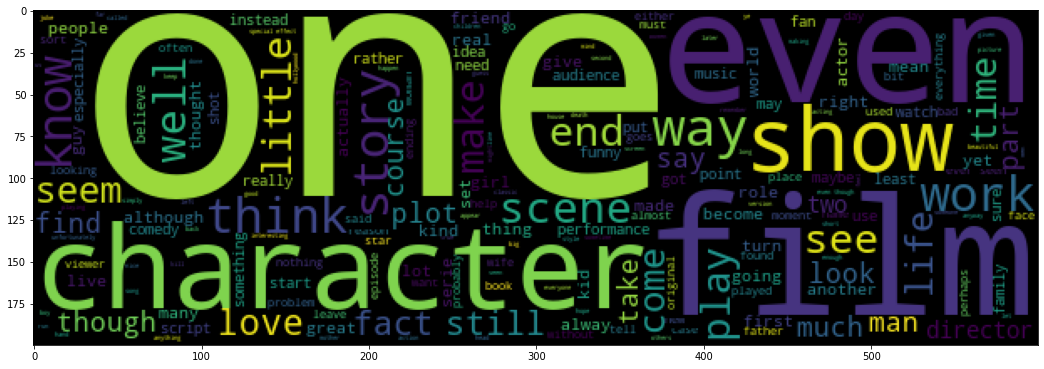

In [11]:
stopword=set(STOPWORDS)
wordcloud=WordCloud(max_font_size=200,width=600).generate(str(clean_review))
fig=plt.figure(figsize=(18,8))
plt.imshow(wordcloud)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_features,training["sentiment"],test_size=0.2,random_state=0)

In [13]:

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[7027  456]
 [ 548 6969]]
0.9330666666666667


In [14]:
test_features = []
for i in range(0,len(test)):
    test_features.append(clean_text(test['review'][i]))
test_data_features=vector.transform(test_features)


In [15]:
y_pred=rf.predict(test_data_features)

In [16]:
output=pd.DataFrame({"id":test['id'] , 'sentiment':y_pred})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",0
4,"""12128_7""",1


In [17]:
output.to_csv('submit2.csv',index=False,quoting=3)

Adding imdb dataset to the existing training

In [18]:
output.shape

(25000, 2)

(100000, 3)

(50000, 2)

(75000, 2)

,sentiment,review
74995,1,"Seeing as the vote average was pretty low, and..."
74996,1,"The plot had some wretched, unbelievable twist..."
74997,1,I am amazed at how this movie(and most others ...
74998,1,A Christmas Together actually came before my t...
74999,1,Working-class romantic drama from director Mar...


In [11]:
vector1=CountVectorizer(analyzer='word',max_features=6000)

In [13]:
features1=vector1.fit_tansform(data_features)
features.toarray()

AttributeError: 'CountVectorizer' object has no attribute 'fit_tansform'

'uk edition show rather less extravagant us version person concerned get new kitchen perhaps bedroom bathroom wonderfully grateful got us version show everything reality tv instead making improvements house occupants could afford entire house gets rebuilt know show trying show lousy welfare system exists us beg hard enough receive rather vulgar product placement takes place particularly sears also uncalled rsther turning one family deprived area potential millionaires would far better help community whole instead spending hundreds thousands dollars one home build something whole community perhaps place diy power tools borrowed returned along building materials everyone benefit want giving one person cause enormous resentment among rest local community still live run houses'